In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/train.csv') 


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) #shuffling to prevent our model learning any patterns from the orginal data 

data_dev = data[0:1000].T #first thousand 
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))  # For numerical stability
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    Y = Y.astype(int)  # Ensure Y is integer
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[1 0 0 0 1 1 0 3 3 1 1 6 0 0 6 0 3 1 1 0 3 0 1 0 1 1 0 0 0 0 3 0 0 3 6 1 0
 0 3 1 0 3 3 3 3 0 3 0 0 3 3 0 3 3 1 1 0 6 3 3 3 0 0 1 0 1 1 0 0 0 3 1 3 1
 0 3 1 0 1 3 1 0 0 1 3 1 0 3 0 3 0 1 0 0 1 3 3 1 0 3 0 3 0 4 0 0 0 3 3 3 3
 1 0 1 1 3 1 0 1 0 3 0 1 0 0 0 6 3 0 0 3 1 3 1 3 3 1 3 3 1 0 3 1 0 0 3 0 3
 3 0 3 0 0 3 0 3 3 0 3 0 3 3 0 1 0 1 3 3 0 1 3 0 3 0 3 1 3 0 3 0 0 0 1 3 1
 1 0 3 1 0 1 3 3 0 0 3 3 6 3 0 0 0 3 1 3 1 0 0 1 0 1 3 3 3 3 1 3 0 3 1 6 1
 1 0 3 3 0 3 3 3 0 0 3 0 0 4 0 0 0 3 1 3 3 0 1 3 6 3 3 3 0 0 3 0 3 3 1 3 1
 1 0 1 3 0 0 0 3 3 1 1 0 0 3 0 0 0 3 3 6 0 1 3 0 0 1 1 0 0 0 3 3 3 1 1 0 1
 3 0 3 0 0 0 0 1 3 0 3 3 1 1 0 0 3 3 1 0 0 3 0 0 1 3 0 3 0 3 0 1 0 0 0 0 3
 3 0 1 3 3 0 3 0 1 3 3 3 0 0 1 3 1 3 3 3 0 3 0 3 1 0 0 0 3 0 0 0 3 3 3 0 0
 0 1 1 1 1 0 0 0 1 3 3 3 3 1 0 3 0 4 3 3 3 0 1 8 0 0 0 3 1 3 0 3 1 3 0 3 0
 0 3 1 0 0 3 1 0 0 0 1 3 0 1 0 1 1 0 0 3 1 1 0 6 0 1 1 3 0 1 0 9 0 9 6 0 1
 3 6 3 3 3 3 0 1 0 0 0 3 3 3 1 3 3 0 1 3 0 1 3 3 0 3 3 3 3 0 6 0 3 3 0 0 1
 0 0 0 0 3 

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7.0


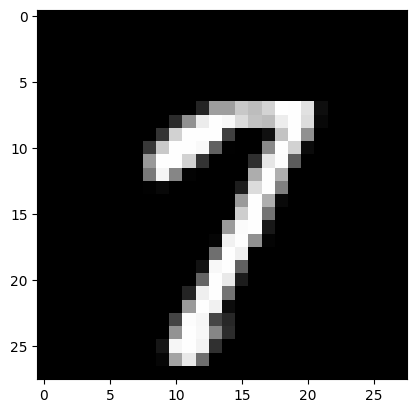

Prediction:  [2]
Label:  2.0


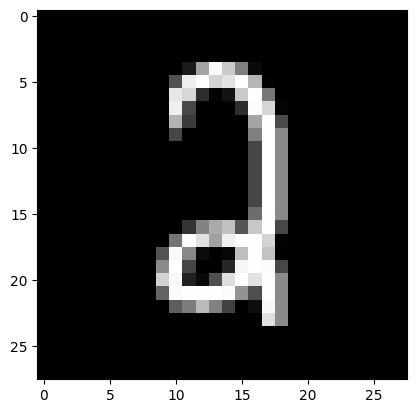

Prediction:  [8]
Label:  8.0


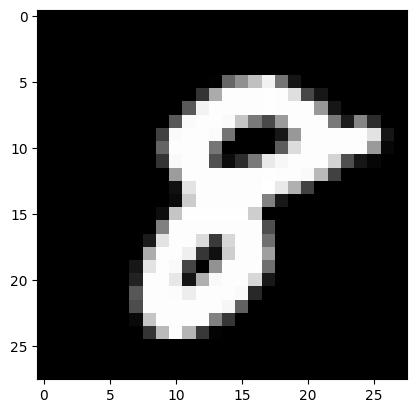

Prediction:  [5]
Label:  5.0


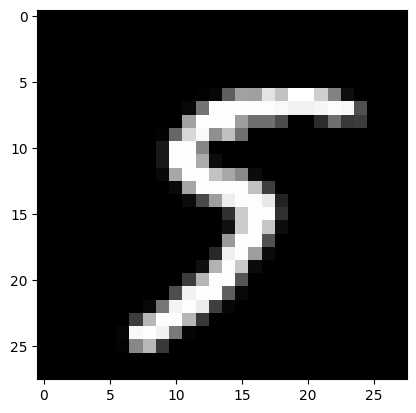

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 4 4 8 4 9 4 9 5 0 3 4 6 4 0 1 7 9 1 6 9 3 8 9 8 8 8 5 8 5 9 5 0 1 4 3 1
 5 8 5 9 1 9 5 6 9 2 8 2 7 6 9 4 5 4 6 9 7 2 3 0 7 4 5 2 7 2 6 0 9 2 0 0 3
 2 0 5 4 4 0 9 6 3 2 0 1 3 0 8 8 3 0 0 7 2 2 8 7 4 4 3 0 1 4 9 5 2 5 4 8 1
 7 2 2 2 8 8 0 1 2 0 7 8 6 7 4 6 6 1 8 4 9 2 0 6 9 6 1 7 1 8 6 4 5 9 9 5 8
 7 6 7 8 0 5 5 2 3 5 9 8 3 2 8 7 1 4 3 3 7 0 2 2 3 6 9 3 6 8 4 2 2 8 1 6 2
 2 7 1 3 3 8 2 0 1 2 8 2 4 8 4 5 6 7 9 7 1 3 0 6 4 4 9 0 6 6 5 6 0 3 5 7 2
 2 7 5 1 4 0 5 6 0 4 4 7 6 8 9 3 8 0 4 3 2 2 9 8 5 0 6 2 6 4 0 3 7 7 0 1 5
 2 4 9 2 6 3 7 6 0 4 0 0 6 2 4 7 6 2 9 9 9 2 6 9 3 9 3 0 2 1 4 1 9 4 7 2 3
 6 3 8 3 0 6 0 9 4 3 2 9 1 7 9 5 6 7 0 0 7 7 9 4 9 9 9 5 1 9 9 2 1 9 2 4 1
 2 0 9 8 5 5 9 9 9 1 9 5 6 0 1 0 9 7 6 3 0 4 5 6 3 8 7 0 4 9 4 8 6 1 0 5 1
 8 3 4 3 3 1 1 4 7 3 5 7 0 6 9 8 2 5 9 4 5 9 3 3 9 4 4 0 0 9 3 0 8 3 6 5 2
 6 7 7 6 2 2 9 1 1 0 2 5 0 1 4 5 8 9 9 8 4 8 5 3 9 5 3 4 8 4 1 5 6 7 0 2 5
 5 8 0 0 6 7 9 1 9 6 1 2 9 4 2 4 0 8 0 3 7 5 5 1 8 2 8 5 1 6 9 6 1 6 6 9 8
 4 3 6 1 2 4 6 4 2 1 4 0 

0.728